In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
import pandas as pd
from matplotlib import pyplot as plt

In [9]:
data = load_iris()

In [10]:
df = pd.DataFrame(data = data.data, columns = data.feature_names)
target = data.target

In [11]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
import numpy as np
unique_values, count = np.unique(target,return_counts = True)
target_values = data.target_names

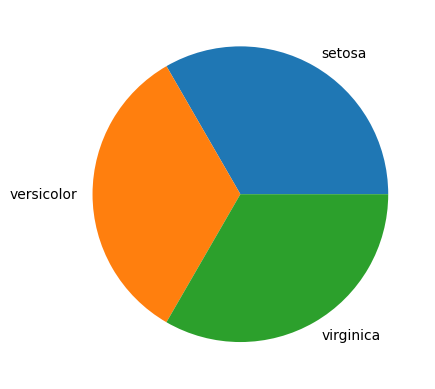

In [13]:
plt.pie(count,labels = target_values)
plt.show()

In [14]:
trainX, testX, trainY, testY = train_test_split(df, target, test_size = 0.2, shuffle  = True)

In [15]:
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
pipe = Pipeline([("logistic_regression",LogisticRegression(max_iter=100))])
pipe.fit(trainX,trainY)

Pipeline(steps=[('logistic_regression', LogisticRegression())])

In [16]:
(pipe.predict(testX) == testY).sum()

27

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testY,pipe.predict(testX))

In [18]:
print(cm)

[[ 9  0  0]
 [ 0  8  0]
 [ 0  3 10]]


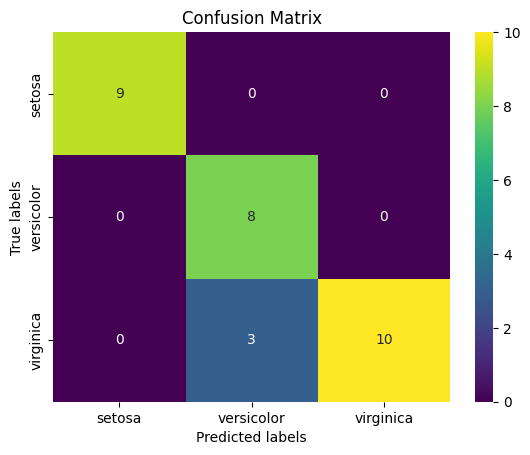

In [19]:
class_labels = target_values
import seaborn as sns
sns.heatmap(cm, annot = True, cmap = "viridis")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.xticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels)
plt.yticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels)
plt.show()

In [ ]:
target_values

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
pipe.named_steps["logistic_regression"].coef_

array([[-0.43464966,  0.91386548, -2.37391878, -1.01619977],
       [ 0.36409147, -0.34860414, -0.16615549, -0.88966761],
       [ 0.07055819, -0.56526135,  2.54007427,  1.90586738]])

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(pipe.predict(testX),testY)

0.9

Naive Bayes Classifier : First Calculate the probabilities

In [36]:
uniq_target, uniq_count = np.unique(trainY,return_counts = True)
uniq_Prob = uniq_count/(uniq_count.sum(axis = 0)) 

In [41]:
trainX[trainY == 0].mean(),trainX[trainY == 0].std()

(sepal length (cm)    5.029268
 sepal width (cm)     3.478049
 petal length (cm)    1.468293
 petal width (cm)     0.248780
 dtype: float64,
 sepal length (cm)    0.350887
 sepal width (cm)     0.350366
 petal length (cm)    0.163461
 petal width (cm)     0.109822
 dtype: float64)

In [44]:
import scipy as sp

In [96]:
setosa, velosa, virginia = trainX[trainY==0],trainX[trainY==1],trainX[trainY==2]
setosaMean = setosa.mean(axis = 0)
setosaStd = setosa.std(axis = 0)
velosaMean = velosa.mean(axis = 0)
velosaStd = velosa.std(axis = 0)
virginiaMean = virginia.mean(axis = 0)
virginiaStd = virginia.std(axis = 0)
Zsetosa = (setosa - setosa.mean(axis = 0))/setosa.std(axis = 0)
Zvelosa = (velosa - velosa.mean(axis = 0))/velosa.std(axis = 0)
Zvirginia = (virginia - virginia.mean(axis = 0))/virginia.std(axis = 0)
prob_Zsetosa = sp.stats.norm.pdf(Zsetosa,0,1)
prob_Zvelosa = sp.stats.norm.pdf(Zvelosa,0,1)
prob_Zvirginia = sp.stats.norm.pdf(Zvirginia,0,1)

In [171]:
results = []
for i in range(len(testX)):
    prob_ZsetosaY = (sp.stats.norm.pdf((testX.iloc[i,:] - setosaMean)/setosaStd,0,1)).prod()
    prob_ZvelosaY = sp.stats.norm.pdf((testX.iloc[i,:] - velosaMean)/velosaStd,0,1).prod()
    prob_ZvirginiaY = sp.stats.norm.pdf((testX.iloc[i,:] - virginiaMean)/virginiaStd,0,1).prod()
    normalizedProb = np.array([prob_ZsetosaY,prob_ZvelosaY,prob_ZvirginiaY])
    normalizedProb = normalizedProb/normalizedProb.sum()
    condition = normalizedProb == normalizedProb.max()
    results.append([np.where(condition== True)[0][0]])
results = np.array(results)
results = results.reshape(results.size)

In [172]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(results, testY)

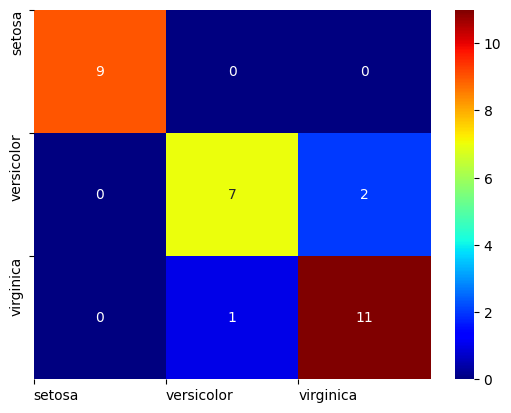

In [173]:
import seaborn as sns
sns.heatmap(cm,cmap = "jet", annot = True)
plt.xticks(ticks=np.arange(len(data.target_names)), labels=data.target_names,ha = "left")

# Set y-axis tick labels
plt.yticks(ticks=np.arange(len(data.target_names)), labels=data.target_names, va = "top")
plt.show()

In [179]:
from sklearn.naive_bayes import GaussianNB

gb = GaussianNB()
gb.fit(trainX, trainY)
(gb.predict(testX)==results).sum()

29